# Técnicas Monte Carlo

O pacote numpy vem com uma coleção completa de geradores aleatórios baseados nos melhores algoritmos:

http://docs.scipy.org/doc/numpy/reference/routines.random.html


[0.48607615 0.5265825  0.48007521 0.45757168 0.48457592 0.51308038
 0.49807803 0.53858438 0.48007521 0.46207239 0.4965778  0.48607615
 0.52208179 0.52058156 0.5010785  0.5310832  0.47257404 0.49807803
 0.52208179 0.54908602 0.49507756 0.46807333 0.50407897 0.48007521
 0.50557921 0.51158015 0.49957827 0.50857968 0.55208649 0.45157074] [8.00024195 8.06689818 8.1335544  8.20021062 8.26686684 8.33352307
 8.40017929 8.46683551 8.53349173 8.60014795 8.66680418 8.7334604
 8.80011662 8.86677284 8.93342907 9.00008529 9.06674151 9.13339773
 9.20005396 9.26671018 9.3333664  9.40002262 9.46667885 9.53333507
 9.59999129 9.66664751 9.73330374 9.79995996 9.86661618 9.9332724
 9.99992863] <a list of 30 Patch objects>


/home/hmonteiro/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


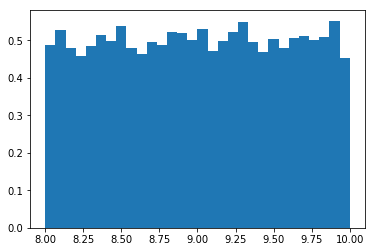

In [8]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


s = np.random.uniform(8,10., 10000)

count, bins, ignored = plt.hist(s, 30, normed=True)

print count, bins, ignored
plt.show()

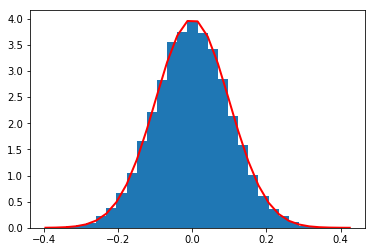

In [9]:
import numpy as np
import matplotlib.pyplot as plt

mu, sigma = 0, 0.1 # mean and standard deviation

s = np.random.normal(mu, sigma, 30000)

count, bins, ignored = plt.hist(s, 30, normed=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
                linewidth=2, color='r')

plt.show()

/home/hmonteiro/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  import sys


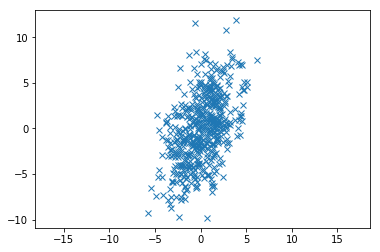

In [10]:
import numpy as np
import matplotlib.pyplot as plt

mean = [0, 0]
cov = [[1, 10], [5, 10]]  # covariancia diagonal

x, y = np.random.multivariate_normal(mean, cov, 500).T
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

## Simulando jogo de dados

In [11]:
import numpy as np

p = np.random.random()

if p > 0.2:
    print 'cara', p
else: 
    print 'coroa', p

coroa 0.131409232962


## Simulando decaimento radiativo

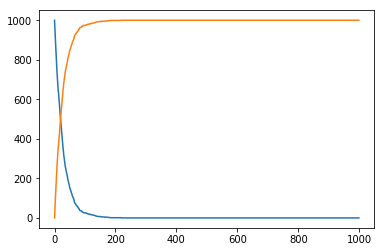

0.0371327005142


In [12]:
NL1 = 1000
NPb = 0
tau = 3.053*60./10
h = 1
tmax = 1000

p = 1 - 2**(-h/tau)

tlist = np.arange(0.,tmax,h)
Tl1list = []
Pblist = []

for t in tlist:
    Tl1list.append(NL1)
    Pblist.append(NPb)
    decay = 0
    for i in range(NL1):
        if np.random.random() < p:
            decay += 1
    NL1 -= decay
    NPb += decay
    
plt.plot(tlist,Tl1list)
plt.plot(tlist,Pblist)
plt.show()
print p

## Simulando um andar de bebado

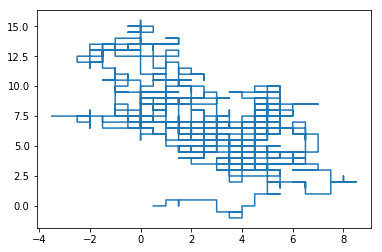

In [18]:


import numpy as np
import matplotlib.pyplot as plt

dt = 1.0 # minutos
tmax = 1200.
tempo = np.arange(0.,tmax,dt)

# ponto de partida
x0 = 0.
y0 = 0.

posicao = []
for t in tempo:
    #sorteia um numero de 0 a 1
    passo = np.random.random()
    sentido = np.random.random()
    
    if (passo < 0.5):
        if(sentido <0.5):
            posicao.append([x0+0.5,y0+0.])
            x0 += 0.5
        else:
            posicao.append([x0-0.5,y0+0.])
            x0 -= 0.5
        
    else:
        if(sentido <0.5):
            posicao.append([x0,y0+0.5])
            y0 += 0.5
        else:
            posicao.append([x0,y0-0.5])
            y0 -= 0.5
        
posicao = np.array(posicao)

plt.plot(posicao[:,0],posicao[:,1])

## Integração Monte Carlo

/home/hmonteiro/anaconda2/lib/python2.7/site-packages/pandas/_libs/__init__.py:3: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .tslib import iNaT, NaT, Timestamp, Timedelta, OutOfBoundsDatetime
/home/hmonteiro/anaconda2/lib/python2.7/site-packages/pandas/__init__.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import (hashtable as _hashtable,
/home/hmonteiro/anaconda2/lib/python2.7/site-packages/pandas/core/dtypes/common.py:6: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import algos, lib
/home/hmonteiro/anaconda2/lib/python2.7/site-packages/pandas/core/util/hashing.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import hashing, tslib
/home/hmonteiro/anaconda2/lib/python2.7/site-packages/pandas/core/i

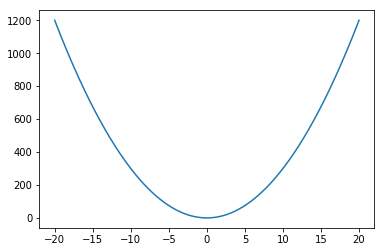

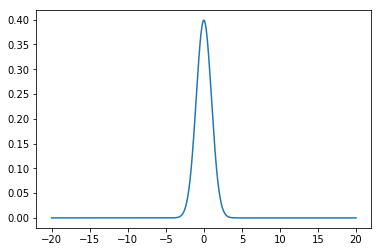

(0.3, 2.5, 0, 19.75)
15.6563385
(0.3, 2.5, 0, 1.3813878154605241)
0.37438096297048035
(0.3, 2.5, 0, 19.75)


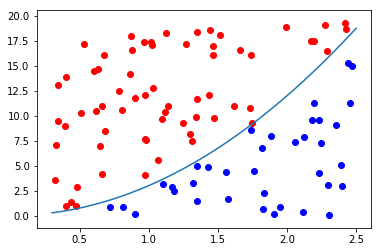

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def easy_function(x):
    return((3)*(x**2))

def hard_function(x):
    return((1/np.sqrt(2*np.pi))*np.exp(-(x**2)/2))

X=np.linspace(-20,20,1000)
plt.plot(X,easy_function(X))
plt.show()

plt.plot(X,hard_function(X))
plt.show()

def integrate(x1,x2,func=easy_function,n=100000):
    X=np.linspace(x1,x2,1000)
    y1=0
    y2=max((func(X)))+1
    print(x1,x2,y1,y2)
    area=(x2-x1)*(y2-y1)
    check=[]
    xs=[]
    ys=[]
    for i in range(n):
        x=np.random.uniform(x1,x2,1)
        xs.append(x)
        y=np.random.uniform(y1,y2,1)
        ys.append(y)
        if abs(y)>abs(func(x)) or y<0:
            check.append(0)
        else:
            check.append(1)
    return(np.mean(check)*area,xs,ys,check)

print(integrate(0.3,2.5)[0])
print(integrate(0.3,2.5,hard_function)[0])
_,x,y,c=integrate(0.3,2.5,n=100)
df=pd.DataFrame()
df['x']=x
df['y']=y
df['c']=c

X=np.linspace(0.3,2.5,1000)
plt.plot(X,easy_function(X))
plt.scatter(df[df['c']==0]['x'],df[df['c']==0]['y'],color='red')
plt.scatter(df[df['c']==1]['x'],df[df['c']==1]['y'],color='blue')
plt.show()